Data Fields

- split: Train, Test split
- message: English text of actual messages related to disaster
- original: Text of column 3 in native language as originally written
- genre: Type of message, including direct messages, social posting, and news stories or bulletins
- related: Is the message disaster related? 1= yes, 0=no, 2=maybe
- PII: Does the message contain PII? 1= yes, 0=no
- request: Does the message contain a request? 1= yes, 0=no
- offer: Does the message contain an offer? 1= yes, 0=no
- aid_related: Is the message aid related? 1= yes, 0=no
- medical_help: Does the message concern medical help? 1= yes, 0=no
- medical_products: Does the message concern medical products? 1= yes, 0=no
- search_and_rescue: Does the message concern search and rescue? 1= yes, 0=no
- security: Does the message concern security? 1= yes, 0=no
- military: Does the message concern military? 1= yes, 0=no
- child_alone: Does the message mention a child alone? 1= yes, 0=no
- water: Does the message concern water? 1= yes, 0=no
- food: Does the message concern food? 1= yes, 0=no
- shelter: Does the message concern shelter? 1= yes, 0=no
- clothing: Does the message concern clothing? 1= yes, 0=no
- money: Does the message concern money? 1= yes, 0=no
- missing_people: Does the message indicate missing people? 1= yes, 0=no
- refugees: Does the message concern refugess? 1= yes, 0=no
- death: Does the message imply death? 1= yes, 0=no
- other_aid: Is there any other aid needed? 1=yes, 0=no
- infrastructure_related: Does the message concern infrastructure? 1= yes, 0=no
- transport: Does the message concern transport? 1= yes, 0=no
- buildings: Does the message concern buildings? 1= yes, 0=no
- electricity: Does the message concern electricity? 1= yes, 0=no
- tools: Does the message concern tools? 1= yes, 0=no
- hospitals: Does the message concern clothing? 1= yes, 0=no
- shops: Does the message concern clothing? 1= yes, 0=no
- aid_centers:Does the message concern clothing? 1= yes, 0=no
- other_infrastructure:Does the message concern clothing? 1= yes, 0=no
- weather_related: Does the message concern weather? 1= yes, 0=no
- floods: Does the message indicate there was a flood? 1= yes, 0=no
- storm: Does the message indicate there was a storm? 1= yes, 0=no
- fire: Does the message indicate there was a fire? 1= yes, 0=no
- earthquake: Does the message indicate there was an earthquake? 1= yes, 0=no
- cold: Does the message indicate there was a cold? 1= yes, 0=no
- other_weather: Does the message indicate there was other weather issues? 1= yes, 0=no
- direct_report: Does the show a direct report? 1= yes, 0=no

***I. IMPORT DATA AND PREPARATION***

In [ ]:
import pandas as pd

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import re

In [ ]:
%pip install torch

In [ ]:
%pip install xgboost

In [ ]:
%pip install seaborn

In [ ]:
%pip install transformers

In [ ]:
%pip install wordcloud

In [ ]:
df=pd.read_csv("Medical_Severity_Dataset_8.csv")
df.head(5)

,ID,Type,Message,Medical_severity
0,18,validation,I am in Croix-des-Bouquets. We have health iss...,1
1,38,validation,"People I'm at Delma 2, we don't anything what ...",1
2,39,test,We are at Gressier we needs assistance right a...,0
3,78,validation,How can we find help and food in fontamara 43 ...,0
4,118,validation,( im taking a guess at this sorry its a mix of...,1


In [ ]:
df = df.drop(['Type'], axis=1)

In [ ]:
df = df.drop_duplicates()

In [ ]:
import seaborn as sns

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Medical_severity', ylabel='count'>

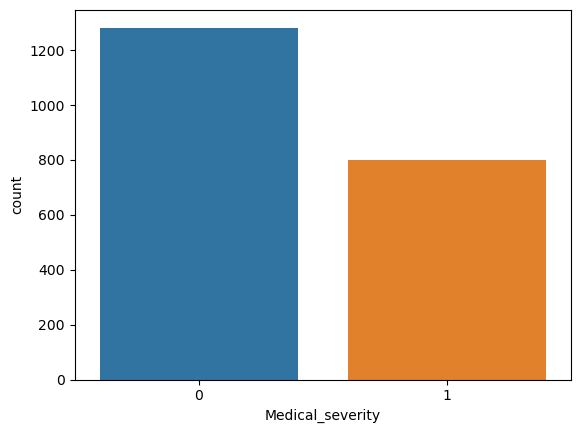

In [ ]:
sns.countplot(df['Medical_severity'])

In [ ]:
# Split the data into training, validation, and test sets with a 80:10:10 ratio
# First split the data into a 90:10 ratio for the test set
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42, stratify=df['Medical_severity'], shuffle=True)


Using Stratified splits so that there will be same ratio of positive and negative classes across test and train folds

In [ ]:
df_train.head()

,ID,Message,Medical_severity
1628,21850,If the residents of these camps are left once ...,0
940,29824,Boko Haram staged its most deadly assault on t...,1
1991,134,I woul like to know if aide is only available ...,0
872,16870,Rescue workers said the death toll could rise ...,0
577,26601,Soliders and health officials stepped up anti-...,1


In [ ]:
df_test.head()

,ID,Message,Medical_severity
1426,19714,"Early in the morning on January 17, Mount Nyir...",0
1620,21784,"Some 500,000 people were evacuated because of ...",1
204,4362,"Good evening, I am in Leogane in a temporary S...",0
190,4205,requesting power and financial support for vic...,0
350,7148,Is Latortue not in Haiti. We've gotten no help...,0


In [ ]:
df_train=df_train.applymap(str)
df_test=df_test.applymap(str)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Medical_severity', ylabel='count'>

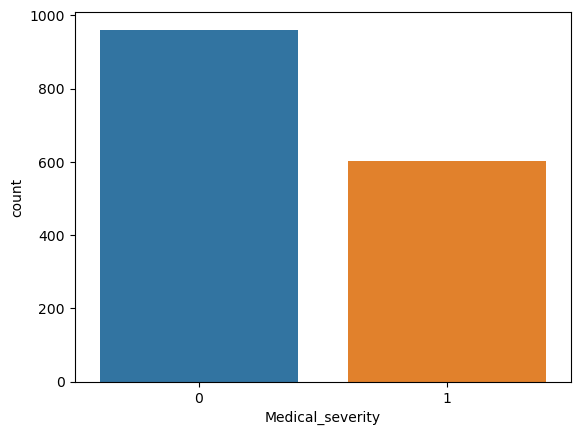

In [ ]:
pd.value_counts(df_train['Medical_severity'])
sns.countplot(df_train['Medical_severity'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Medical_severity', ylabel='count'>

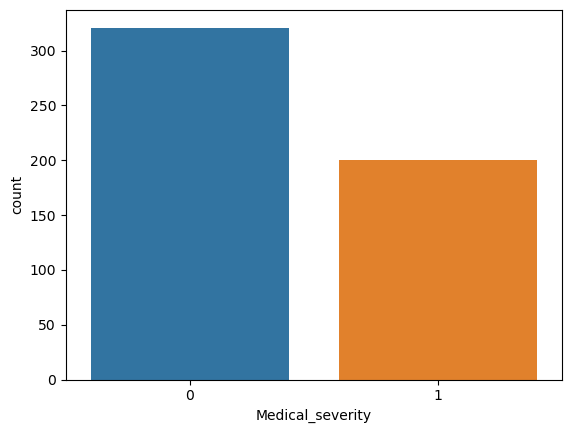

In [ ]:
pd.value_counts(df_test['Medical_severity'])
sns.countplot(df_test['Medical_severity'])

In [ ]:
def join_words(words_list):
    return ' '.join(words_list)

In [ ]:
#Set up stop words for removal
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
from nltk.corpus import stopwords
#stopwords
stop_words=stopwords.words("english")


[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [ ]:
list_of_stop_words=["the", "has", "it", "with", "were", "can", "of","to","on", "this", "about", "that","was", "also",
                    "http", "are","is", "am","some", "about","a", "an", "which", "what", "how", "when", "who","this",
                    "that","are", "the", "to", "we", "have", "in", "you", "with", "of", "what", "be", "as", "has", "from",
                    "by", "that", "am","people","know","dont","also","would","people","please","like","would","People",
                    "Know","need","Need","Also","Like","Would","Dont","take","make","tell","well","many","Many","want",
                    "Want","cause","still","since","give","year","include","problem","place","region","number","find",
                    "provide","come","can","could","may","might","area","affect","world","person","part","thank",
                    "thanks","haiti", "information", "good", "anything", "nothing", "time","help","country","report",
                    "can","cant","cannot","can not","along","didnt","never","anymore",'havent',"without","others",
                    "natural","response","disaster","sandy","food","continue","something","even","already","continue",
                    'disaster',"much","last","year","month","week","already", "important", "concern", "morning", 
                    "haitian", "system", "leave", "friend", "mother", "back","lose","portauprince","assisstance",
                    "relief","risk","management","support","stay","livelihood","temporary","support","send","someone",
                    "somebody","portauprince","flood","water","hurricane","earthquake","storm","bitly","rain","never",
                    "anymore","without","sandy","food","response","something","even","didnt","much","especially","last",
                    "week","year","month","sent","send","receive","daily","inside","concern","already","temporary",
                    "government","message",'nothern','central','local','start','severly','bring','india','district','province','flooding',
                    'official','santiago',"will","help","need","cross","people","thank","still","said","last","help","people","u","will",
                    "information","several","anything","find","thank","want","area","said","including","need","team","work",
                    "live","lives","note","notes",'from','to','as','of','are','such','and','from','to','are','with','include','including',
                    'among','general','though','as','of','which','are','or','with','though','namely','also','a','an','against','food','water',
                    'people','will','people','will','need','many','area','said','u','current','situation','operation',"hello",
                    'really','trouble','bother','worry','info','please','we','case','fell','able','possibility','legally','initial','follow',
                   'kmhr', 'jaffna','wind','international','federation','crescent','societies','november','rainfall','cyclonic','septemberend','aedes','breeding','corps','ministry',
                    'supply','measure', 'richter', 'scale', 'united', 'nations', 'sierra', 'leone', 'banda', 'aceh', 'shelter',
                   'material', 'heavy', 'monsoon', 'health', 'south africa', 'indonesia', 'africa', 'tent']
#          
list_of_stop_words = list(set(list_of_stop_words))
stop_words.extend(list_of_stop_words)

In [ ]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())
    x = re.sub(r'\b\w{1,3}\b',' ',x)
    x = re.sub(r'\d+',' ', x)
    stop_words = list(stopwords.words('english'))
    stop_words.extend(list_of_stop_words)
    x = [w for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [ ]:
#mapping pos tags
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
#lemmatizing 
import string

def clean_text(text):
    text = [word.strip(string.punctuation) for word in text.split()]
    pos_tags = pos_tag(text)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = " ".join(text)
    return(text)

In [ ]:
df_train=df_train.applymap(str)
df_test=df_test.applymap(str)

In [ ]:
df_train['message_cleaned']=df_train['Message'].apply(clean_text)
df_test['message_cleaned']=df_test['Message'].apply(clean_text)

df_train['message_cleaned']=df_train['message_cleaned'].apply(preprocess)
df_test['message_cleaned']=df_test['message_cleaned'].apply(preprocess)

II. FEATURE EXTRACTION

2.1 BAG-OR-WORDS

In [ ]:
# Create a CountVectorizer object and fit it on the "message" column of the train dataframe
count_vectorizer = CountVectorizer()
train_bow = count_vectorizer.fit_transform(df_train['message_cleaned'])

# fit count vectorizer of train data on the "message" column of the test dataframe
test_bow = count_vectorizer.transform(df_test['message_cleaned'])

In [ ]:
# Create a dictionary of word frequencies from the BoW matrix for train
bow_dict_train = dict(zip(count_vectorizer.get_feature_names_out(), train_bow.sum(axis=0).tolist()[0]))
# Create a dictionary of word frequencies from the BoW matrix for test
bow_dict_test = dict(zip(count_vectorizer.get_feature_names_out(), test_bow.sum(axis=0).tolist()[0]))


2.2 Word Cloud

In [ ]:
# Import wordcloud
from wordcloud import WordCloud

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Create a word cloud
wordcloud_train = WordCloud(background_color="white").generate_from_frequencies(bow_dict_train)
wordcloud_test = WordCloud(background_color="white").generate_from_frequencies(bow_dict_test)

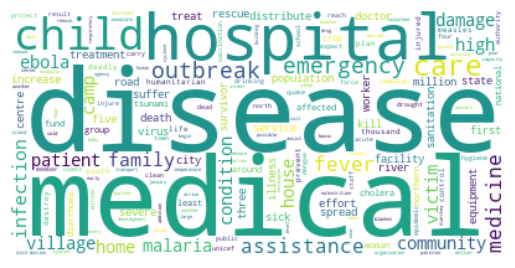

None

In [ ]:
# Train word_cloud
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
display(plt.show())

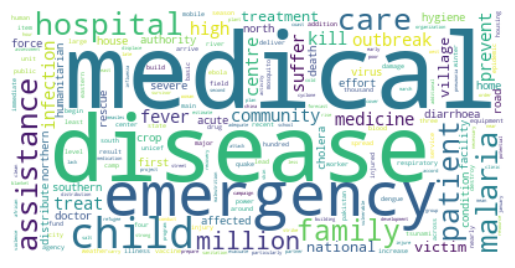

In [ ]:
# Test word_cloud
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.show()

2.3 TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe

tfidf_vectorizer = TfidfVectorizer(max_features=30)

tfidf_df_train_matrix = tfidf_vectorizer.fit_transform(df_train['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_train_matrix = pd.DataFrame(tfidf_df_train_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_train_matrix.fillna(value="", inplace=True)

In [ ]:
# fit trained vectorized on the "message" column of the dataframe
tfidf_df_test_matrix = tfidf_vectorizer.transform(df_test['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_test_matrix = pd.DataFrame(tfidf_df_test_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_test_matrix.fillna(value="", inplace=True)

In [ ]:
tfidf_df_train_matrix.head()

,assistance,camp,care,child,community,condition,damage,disease,ebola,effort,...,infection,malaria,medical,medicine,outbreak,patient,rescue,service,victim,village
0,0.0,0.780425,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.474446,0.0,0.000000,0.0,0.660219,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.639402,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.768873,0.0,0.000000,0.0,0.0,0.0


In [ ]:
tfidf_df_test_matrix.head()

,assistance,camp,care,child,community,condition,damage,disease,ebola,effort,...,infection,malaria,medical,medicine,outbreak,patient,rescue,service,victim,village
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
feature__names=list(tfidf_vectorizer.get_feature_names_out())

In [ ]:
# Extract the top N keywords for each document
N = 3
top_keywords_per_doc_train = []
for row in tfidf_df_train_matrix:
    doc_keywords_train = sorted(list(zip(tfidf_vectorizer.get_feature_names_out(), row)), key=lambda x: x[1], reverse=True)[:N]
    top_keywords_per_doc_train.append([k for k, v in doc_keywords_train])

# Print the keywords for each document
for i, keywords in enumerate(top_keywords_per_doc_train):
    print("Document {}: {}".format(i+1, ", ".join(keywords)))


Document 1: condition, camp, care
Document 2: child, care, assistance
Document 3: care, child, assistance
Document 4: child, care, camp
Document 5: ebola, community, disease
Document 6: condition, camp, disease
Document 7: care, community, condition
Document 8: care, condition, camp
Document 9: care, child, assistance
Document 10: condition, community, child
Document 11: ebola, child, damage
Document 12: disease, damage, community
Document 13: condition, care, community
Document 14: care, community, assistance
Document 15: community, child, care
Document 16: camp, assistance, child
Document 17: camp, care, assistance
Document 18: condition, care, child
Document 19: care, child, camp
Document 20: damage, child, camp
Document 21: condition, disease, camp
Document 22: community, assistance, care
Document 23: assistance, damage, child
Document 24: damage, assistance, child
Document 25: camp, care, community
Document 26: care, damage, assistance
Document 27: community, care, assistance
Docu

2.3.1 Train Word Cloud

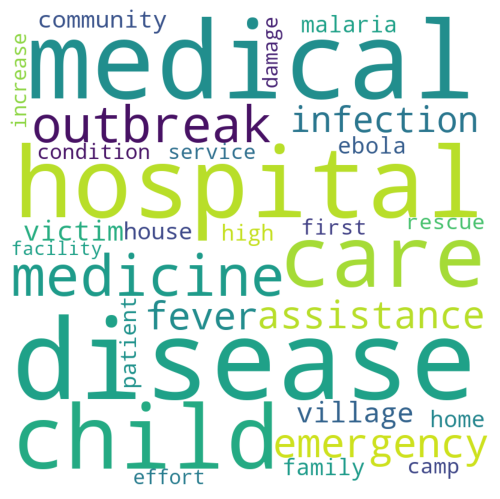

In [ ]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_train_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

2.3.2 Test Word Cloud

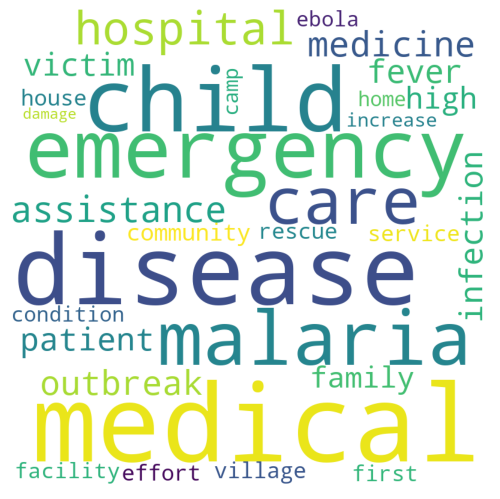

In [ ]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_test_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

2.3.3. Finding word clouds for positive and negative classes individually

In [ ]:
df_train_pos = df_train[df_train['Medical_severity']=="1"]
df_train_neg = df_train[df_train['Medical_severity']=="0"]


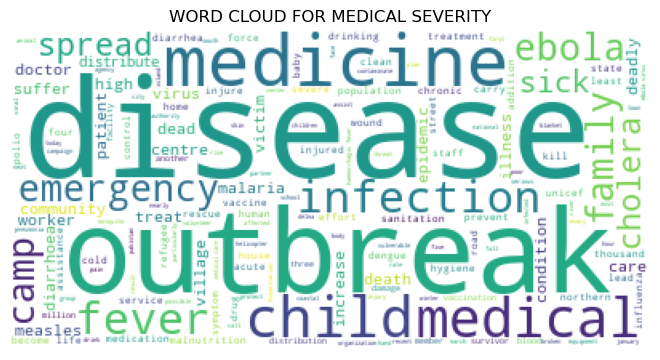

In [ ]:
# create a wordcloud
text = ' '.join(df_train_pos['message_cleaned'])
wordcloud = WordCloud(background_color='white').generate(text)
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("WORD CLOUD FOR MEDICAL SEVERITY")
plt.show()

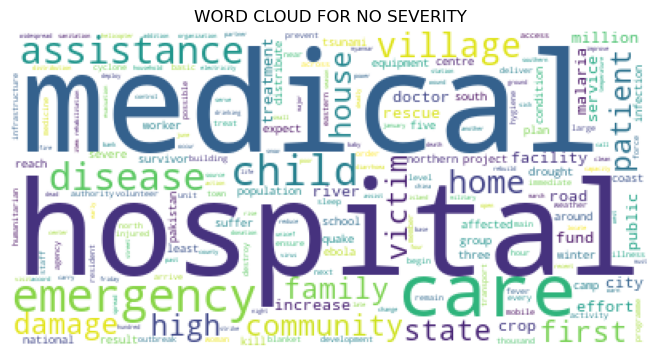

In [ ]:
# create a wordcloud
text = ' '.join(df_train_neg['message_cleaned'])
wordcloud = WordCloud(background_color='white').generate(text)
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WORD CLOUD FOR NO SEVERITY")
plt.tight_layout(pad=0)
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_16240\2538551057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_pos['tokens'] = df_train_pos['message_cleaned'].apply(lambda x: nltk.word_tokenize(x.lower()))
C:\Users\acer\AppData\Local\Temp\ipykernel_16240\2538551057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_pos['bigram'] = df_train_pos['tokens'].apply(lambda x: list(nltk.bigrams(x)))


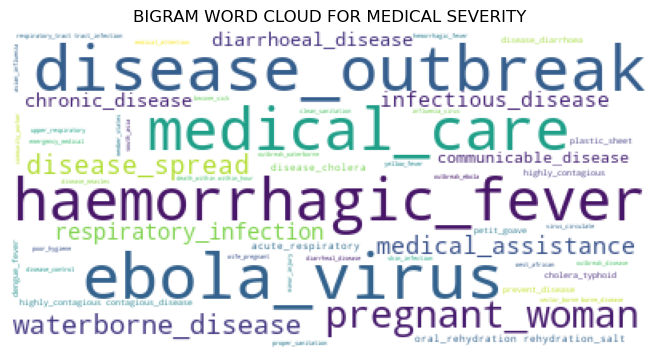

In [ ]:
# create a wordcloud
df_train_pos['tokens'] = df_train_pos['message_cleaned'].apply(lambda x: nltk.word_tokenize(x.lower()))
df_train_pos['bigram'] = df_train_pos['tokens'].apply(lambda x: list(nltk.bigrams(x)))

bigrams = [bigrams for sublist in df_train_pos['bigram'] for bigrams in sublist]
text = ' '.join('_'.join(bigram) for bigram in bigrams)
wordcloud = WordCloud(background_color='white').generate(text)
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("BIGRAM WORD CLOUD FOR MEDICAL SEVERITY")

plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_16240\2266564796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_neg['tokens'] = df_train_neg['message_cleaned'].apply(lambda x: nltk.word_tokenize(x.lower()))
C:\Users\acer\AppData\Local\Temp\ipykernel_16240\2266564796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_neg['bigram'] = df_train_neg['tokens'].apply(lambda x: list(nltk.bigrams(x)))


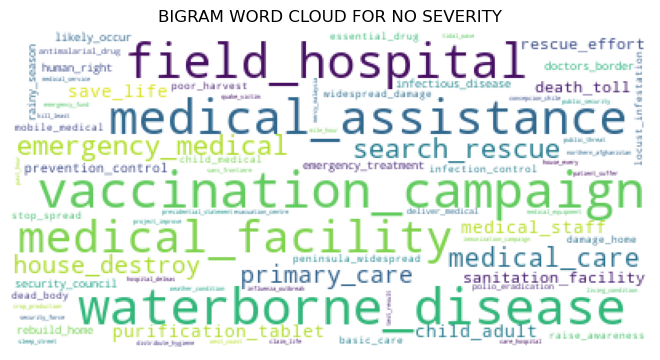

In [ ]:
# create a wordcloud
df_train_neg['tokens'] = df_train_neg['message_cleaned'].apply(lambda x: nltk.word_tokenize(x.lower()))
df_train_neg['bigram'] = df_train_neg['tokens'].apply(lambda x: list(nltk.bigrams(x)))

bigrams = [bigrams for sublist in df_train_neg['bigram'] for bigrams in sublist]
text = ' '.join('_'.join(bigram) for bigram in bigrams)
wordcloud = WordCloud(background_color='white').generate(text)
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("BIGRAM WORD CLOUD FOR NO SEVERITY")

plt.show()

From the positive and negative classes wordclouds we can see that the outbreak of disease is more severe for the victims of disasters. However, it also seems like the medical assistance, hospital, and facility provided and  did make it less severe by alleviating the medical emergencies.

# BIGRAMS

In [ ]:
df_train['tokens'] = df_train['message_cleaned'].apply(lambda x: nltk.word_tokenize(x.lower()))
df_train['bigram'] = df_train['tokens'].apply(lambda x: list(nltk.bigrams(x)))


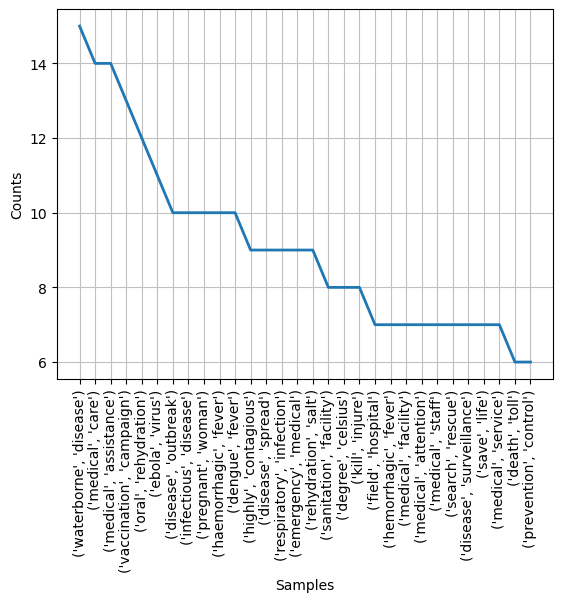

In [ ]:
bigrams = [bigrams for sublist in df_train['bigram'] for bigrams in sublist]
fdist = nltk.FreqDist(bigrams)
fdist.plot(30, cumulative=False)
plt.show()

# TRIGRAMS

In [ ]:
df_train['trigram'] = df_train['tokens'].apply(lambda x: list(nltk.trigrams(x)))


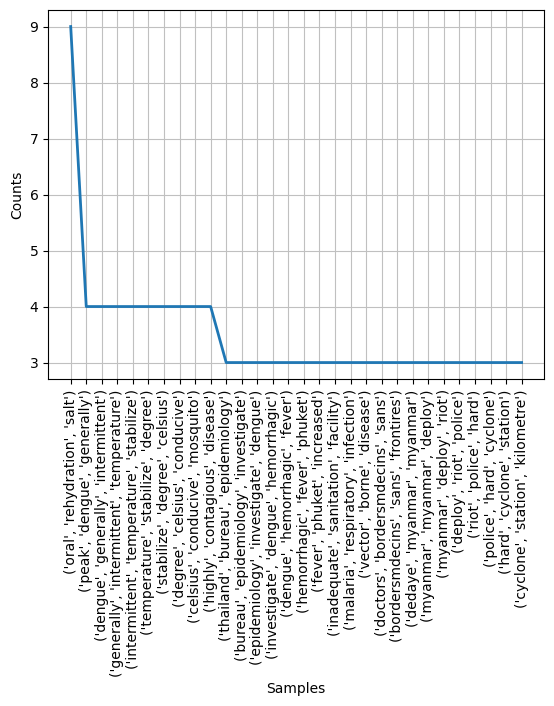

In [ ]:
trigrams = [trigrams for sublist in df_train['trigram'] for trigrams in sublist]
fdist = nltk.FreqDist(trigrams)
fdist.plot(30, cumulative=False)
plt.show()

# 4-grams words

In [ ]:
df_train['fourgram'] = df_train['tokens'].apply(lambda x: list(nltk.ngrams(x, 4)))

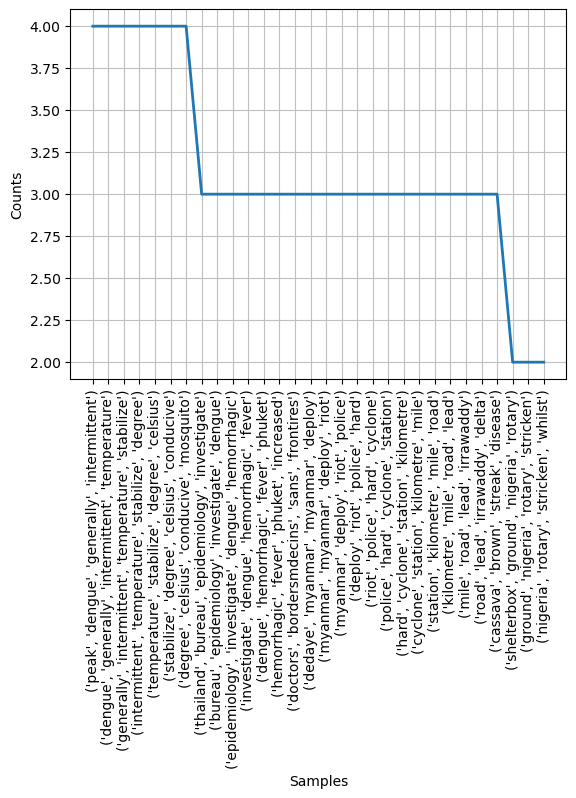

In [ ]:
fourgrams = [fourgrams for sublist in df_train['fourgram'] for fourgrams in sublist]
fdist = nltk.FreqDist(fourgrams)
# print(fourgrams)
fdist.plot(30, cumulative=False)
plt.show()

There were many noises from the bigram, trigram and 4-gram words. Therefore after analysing the frequency of the words used which didn't make any sense were removed by adding those words to the stop word list and the outcome is much more meaningful.

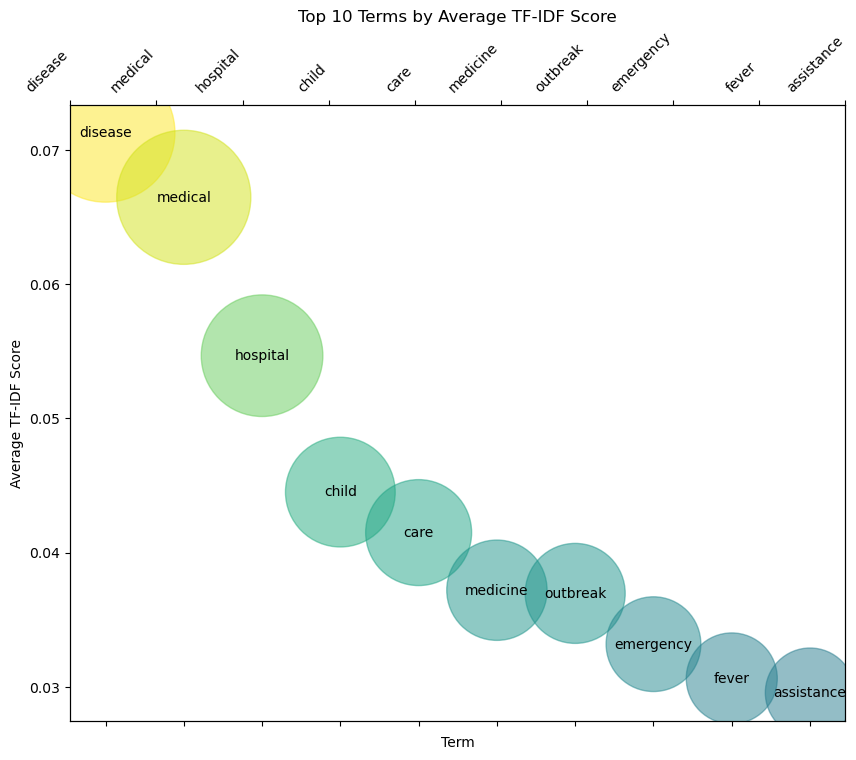

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean TF-IDF scores for each term
term_means = np.mean(tfidf_df_train_matrix, axis=0)

# Sort the terms in descending order by their mean TF-IDF scores
sorted_indices = np.argsort(term_means)[::-1][:10]
sorted_means = term_means[sorted_indices]
sorted_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in sorted_indices]

# Create a bubble chart of the top 100 terms
fig, ax = plt.subplots(figsize=(10, 8))
x = range(len(sorted_terms))
y = sorted_means
sizes = 10000 * sorted_means / np.max(sorted_means)  # calculate size proportional to term means
colors = plt.cm.viridis(sorted_means / np.max(sorted_means))  # map sizes to colors
ax.scatter(x, y, s=sizes, alpha=0.5, c=colors)

# Add text inside the bubbles
for i, term in enumerate(sorted_terms):
    ax.text(i, sorted_means[i], term, ha='center', va='center')

# Set the axis labels and title
ax.set_xlabel("Term")
ax.set_ylabel("Average TF-IDF Score")
ax.set_title("Top 10 Terms by Average TF-IDF Score")

# Set the x-tick labels
ax.set_xticks(x)
ax.set_xticklabels([''] * len(sorted_terms))  # hide the x-tick labels

# Add the word names as a separate axis below the chart
ax2 = ax.twiny()
ax2.set_xticks(x)
ax2.set_xticklabels(sorted_terms, rotation=45, ha='right')

# Show the plot
plt.show()


‘Disease’ and ‘Medical’ are common in the dataset and appear frequently across many documents while it has the highest scores, while the words "assistance" and "fever" are less common and may only appear in a few documents.
The increasing scores for the words "outbreak," "medicine," "care," and "child" suggest that these words are becoming more important in the dataset and are appearing more frequently in documents. 


Another interesting point is that the words "disease" and "medical" appear together and separate from other may suggest they are highly related to each other and may represent a specific topic or theme within the dataset. It's possible that the corpus contains a lot of text related to medical conditions and treatments, which would explain why these words appear frequently and together

***III. Machine learning***

***1. Prepare data***

In [ ]:
import sklearn
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer 


X_train = df_train['message_cleaned']
y_train = df_train['Medical_severity']
X_test = df_test['message_cleaned']
y_test = df_test['Medical_severity']

In [ ]:
feature_vec = TfidfVectorizer(max_features= 500, ngram_range= (1, 3), stop_words= 'english') # Load the tf-idf vectorizer from sklearn
X_train = feature_vec.fit_transform(X_train).toarray()# Fit the vectorizer on the train data
X_test = feature_vec.transform(X_test).toarray() #transform the fit vector of train into unseen test data
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Extract the vocabulary from the vectorizer
vocab = feature_vec.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 500


In [ ]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
resident => 373
camp => 50
hospital => 194
doctor => 126
illness => 206


***2. Random forest***





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [ ]:
def get_score_values(scores):
    print("Precision Score: " + str(scores['test_precision'].mean()) + " +- " + str(2*scores['test_precision'].std()))
    print("Recall Score: " + str(scores['test_recall'].mean()) + " +- " + str(2*scores['test_recall'].std()))
    print("F1 Score: " + str(scores['test_f1'].mean()) + " +- " + str(2*scores['test_f1'].std()))
    print("Accuracy Score: " + str(scores['test_accuracy'].mean()) + " +- " + str(2*scores['test_f1'].std()))

In [ ]:
def cross_val_prediction_report(model_name, X_train, y_train):
    model = model_name
    model.fit(X_train, y_train)
    # convert '0' and '1' to 0 and 1
    y_train = [int(label) for label in y_train]
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    scoring = ['precision', 'recall', 'f1', 'accuracy']
    print("-"*55)
    print("CROSS VALIDATION SCORES FOR: " + str(model_name))
    print("-"*55)
    cross_val = pd.DataFrame(cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1))
    get_score_values(cross_val)

models = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), MultinomialNB(), SVC()]
for model_name in models:
    cross_val_prediction_report(model_name, X_train, y_train)

-------------------------------------------------------
CROSS VALIDATION SCORES FOR: LogisticRegression()
-------------------------------------------------------
Precision Score: 0.7613044840079086 +- 0.11485321665715062
Recall Score: 0.48743169398907105 +- 0.16191756714176817
F1 Score: 0.5904969838510129 +- 0.13488885315034763
Accuracy Score: 0.7432712722521639 +- 0.13488885315034763
-------------------------------------------------------
CROSS VALIDATION SCORES FOR: RandomForestClassifier()
-------------------------------------------------------
Precision Score: 0.682600579221001 +- 0.09695036147890702
Recall Score: 0.62224043715847 +- 0.11297173069221392
F1 Score: 0.6487360174098811 +- 0.06866081611208022
Accuracy Score: 0.7413155316021558 +- 0.06866081611208022
-------------------------------------------------------
CROSS VALIDATION SCORES FOR: DecisionTreeClassifier()
-------------------------------------------------------
Precision Score: 0.6253126279873181 +- 0.0638788173561007


SINCE RANDOM FOREST LOOKS LIKE A GOOD MODEL AND LESS FLUCTUATED COMPARED TO OTHERS, IT CAN BE FURTHER TUNED FOR ITS DIFFERENT PARAMETERS.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
X_train = df_train['message_cleaned']
y_train = df_train['Medical_severity']
X_test = df_test['message_cleaned']
y_test = df_test['Medical_severity']

feature_vec = TfidfVectorizer(max_features=100) # Load the tf-idf vectorizer from sklearn
rf_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('rf', RandomForestClassifier())
])
rf_pipe.fit(X_train, y_train)

tf_params = {
 'tvec__max_features':[300, 400, 500, 600, 700, 800, 900],
 'tvec__ngram_range': [(1, 1), (1, 2), (2, 2), (1, 3), (2, 3)],
 'tvec__stop_words': [None, 'english'],
 
}

TUNING MODEL AND TFDIF BEST FEATURES PARAMETERS

In [ ]:
rf_gs = GridSearchCV(rf_pipe, param_grid=tf_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
{'tvec__max_features': 700, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
0.7516138281314


In [ ]:
# Setting up randomforest params
rf_params = {
 'tvec__max_features': [700],
 'tvec__ngram_range': [(1,2)],
 'tvec__stop_words': [None],
 'rf__bootstrap': [True, False],
}

In [ ]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'rf__bootstrap': True, 'tvec__max_features': 700, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
0.7503358728598345


In [ ]:
rf_params = {
 'tvec__max_features': [700],
 'tvec__ngram_range': [(1,2)],
 'tvec__stop_words': [None],
 'rf__bootstrap': [True],
 'rf__max_features': ['auto', 'sqrt'],
 'rf__min_samples_leaf': [1, 2, 4, 10, 20]
}

In [ ]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'rf__bootstrap': True, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'tvec__max_features': 700, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
0.7477635782747603


In [ ]:
rf_params = {
 'tvec__max_features': [700],
 'tvec__ngram_range': [(1,2)],
 'tvec__stop_words': [None],
 'rf__bootstrap': [True],
 'rf__max_features': ['sqrt'],
 'rf__min_samples_leaf': [2],
 'rf__min_samples_split': [2, 5, 10],
 'rf__n_estimators': [200, 400, 600]
#  'rf__criterion': ['gini', 'entropy', 'logloss']
}

In [ ]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'rf__bootstrap': True, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200, 'tvec__max_features': 700, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
0.7516056361104284


In [ ]:
rf_params = {
 'tvec__max_features': [700],
 'tvec__ngram_range': [(1,2)],
 'tvec__stop_words': [None],
 'rf__bootstrap': [True],
 'rf__max_features': ['auto'],
 'rf__min_samples_leaf': [2],
 'rf__min_samples_split': [2],
 'rf__n_estimators': [200],
 'rf__max_depth': [30, 50, 60]
}

In [ ]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'rf__bootstrap': True, 'rf__max_depth': 60, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200, 'tvec__max_features': 700, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
0.748406651921029


In [ ]:
X_train = df_train['message_cleaned']
y_train = df_train['Medical_severity']
X_test = df_test['message_cleaned']
y_test = df_test['Medical_severity']

feature_vec = TfidfVectorizer(max_features= 700, ngram_range= (1, 2), stop_words= None) 
X_train = feature_vec.fit_transform(X_train).toarray()# Fit the vectorizer on the train data
X_test = feature_vec.transform(X_test).toarray() #transform the fit vector of train into unseen test data
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# model = SVC(kernel='linear', C=3)
# model = RandomForestClassifier( bootstrap= True, max_depth=50,max_features= 'sqrt', min_samples_leaf= 4,
#                                min_samples_split=2, n_estimators = 500)
model = RandomForestClassifier(bootstrap= True, max_depth=50,max_features= 'auto', min_samples_leaf= 2,
                               min_samples_split=2, n_estimators = 800)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
# convert '0' and '1' to 0 and 1
pred_train = [int(label) for label in pred_train]
y_train = [int(label) for label in y_train]
pred_test = [int(label) for label in pred_test]
y_test = [int(label) for label in y_test]

print("-"*53)
print("TRAINING SCORES")
print("-"*53)
print(classification_report(y_train, pred_train))
print("-"*53)
print("TEST SCORES")
print("-"*53)
print(classification_report(y_test, pred_test))
print("-"*53)

-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       961
           1       0.88      0.73      0.80       601

    accuracy                           0.86      1562
   macro avg       0.87      0.84      0.85      1562
weighted avg       0.86      0.86      0.86      1562

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       321
           1       0.69      0.52      0.59       200

    accuracy                           0.73       521
   macro avg       0.72      0.69      0.69       521
weighted avg       0.72      0.73      0.72       521

-----------------------------------------------------



The precision score represents the proportion of true positive predictions among all positive predictions, while the recall score represents the proportion of true positive predictions among all actual positives. The F1-score is a harmonic mean of precision and recall, providing a single summary metric that balances between precision and recall.
For the training set, the model achieved an accuracy of 0.86, with a precision score of 0.85 for class 0 and 0.88 for class 1, and a recall score of 0.94 for class 0 and 0.73 for class 1. The F1-score was 0.89 for class 0 and 0.80 for class 1. For the test set, the model achieved an accuracy of 0.73, with a precision score of 0.74 for class 0 and 0.69 for class 1, and a recall score of 0.86 for class 0 and 0.52 for class.
It seems that the model performs well on the training set, achieving high precision and recall scores for both classes, as well as a high F1-score. This indicates that the model can learn the underlying patterns in the training data and generalize well to new, unseen data.

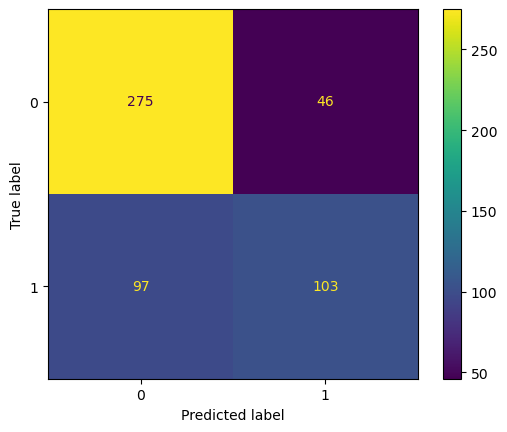

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_test)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

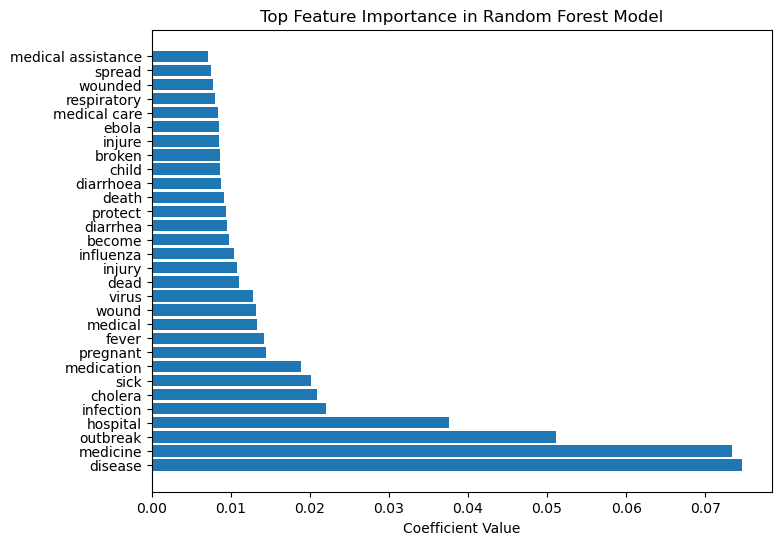

In [ ]:
# Obtain the feature names from the vectorizer
feature_names = feature_vec.get_feature_names_out()
# Generate feature importance plot
importances = model.feature_importances_
# Sort the coefficients in descending order
sorted_importances= sorted(zip(importances, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Random Forest Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [ ]:
top_importances

[(0.07469215574177439, 'disease'),
 (0.07335253464312434, 'medicine'),
 (0.051112214746528765, 'outbreak'),
 (0.03756424260197154, 'hospital'),
 (0.022060798117329576, 'infection'),
 (0.02083545631902479, 'cholera'),
 (0.02010558894711678, 'sick'),
 (0.018915748721479424, 'medication'),
 (0.014415001039655505, 'pregnant'),
 (0.014222794124371281, 'fever'),
 (0.013288669709668117, 'medical'),
 (0.0132079970753682, 'wound'),
 (0.01278777848433809, 'virus'),
 (0.011029599115457702, 'dead'),
 (0.010745485234471346, 'injury'),
 (0.010379058372599628, 'influenza'),
 (0.009815286505207358, 'become'),
 (0.00951539083529058, 'diarrhea'),
 (0.0093643757657933, 'protect'),
 (0.009161596876842459, 'death'),
 (0.008737482253238761, 'diarrhoea'),
 (0.008602407478240493, 'child'),
 (0.008602376891495168, 'broken'),
 (0.008539948332204467, 'injure'),
 (0.00852289153056408, 'ebola'),
 (0.008344851009651927, 'medical care'),
 (0.0079807888459535, 'respiratory'),
 (0.007764446178303047, 'wounded'),
 (0.0

In [ ]:
words = [pair[1] for pair in top_importances]

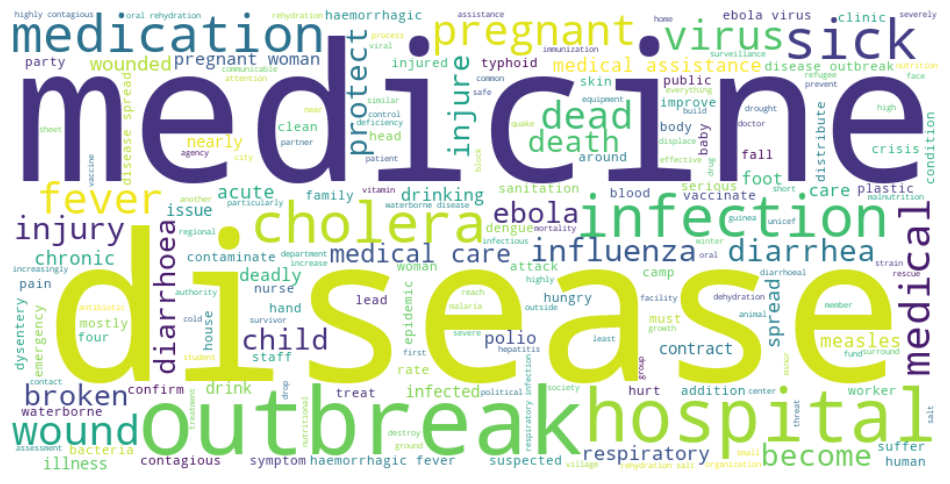

In [ ]:
# Generate feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = feature_vec.get_feature_names_out()
# Generate a dictionary with words and their importances
word_importances = {}
for i in range(len(indices)):
    word_importances[features[indices[i]]] = importances[indices[i]]

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_importances)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The graph and wordcloud above show the features importance’s of the random forest model. The feature’s importance score indicates how much each feature contributes to the model's predictive power. It appears that the top two most important features are "disease" and "medicine". Other important features include "outbreak", "hospital", "infection", "cholera", "sick", and "medication". These features are likely related to health and medical topics, which is not surprising given the context of the model.
Based on this graph, it is evident that the model will give a high severity score for the sentences that contain more words like “disease”, “medicine”, “outbreak”. It makes more sense because those above words may indicate serious medical incidents that may require more resources.
